In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [135]:
df = pd.read_csv('film_festival.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3362 entries, 0 to 3361
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           3362 non-null   int64  
 1   film_festival  3362 non-null   object 
 2   title          3362 non-null   object 
 3   director       3362 non-null   object 
 4   field          3164 non-null   object 
 5   award          381 non-null    object 
 6   genre          3362 non-null   object 
 7   plot           3055 non-null   object 
 8   rating         627 non-null    object 
 9   runtime        3029 non-null   float64
 10  prodYear       3077 non-null   float64
 11  actors         2278 non-null   object 
 12  img_link       2763 non-null   object 
 13  stills         2513 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 367.8+ KB


In [109]:
film_festival_count = pd.DataFrame(df.groupby(['film_festival']).size().sort_values(ascending = False))
film_festival_count = film_festival_count.reset_index()
film_festival_count = film_festival_count.rename(columns={0 :'count'})

In [110]:
film_festival_count

,film_festival,count
0,서울독립영화제,1073
1,대단한 단편영화제,315
2,부산독립영화제,232
3,미쟝센 단편영화제,188
4,서울영등포국제초단편영화제,186
...,...,...
84,시나그 마닐라 독립영화제,1
85,스페이스 4 단편영화제,1
86,IFVA2002단편&비디오시상식,1
87,샌프란시스코 독립영화제,1


<BarContainer object of 13 artists>

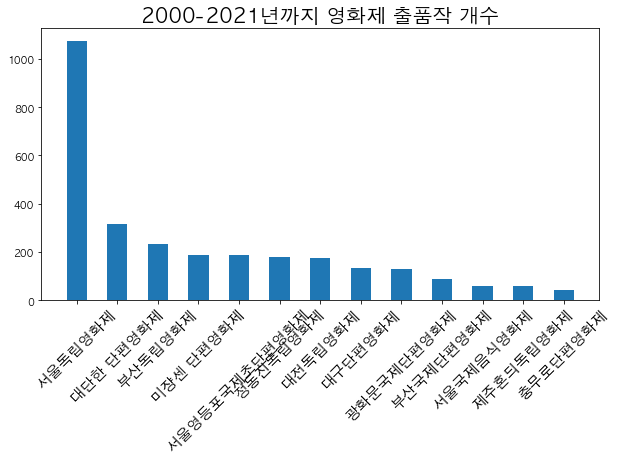

In [186]:
film_festival_count.head(20)
plt.rcParams['font.family'] = 'AppleGothic'
plt.figure(figsize = (10,5))
plt.xticks(rotation = 45, fontsize=15)
plt.title('2000-2021년까지 영화제 출품작 개수', fontsize=20)
plt.bar(film_festival_count.iloc[0:13]['film_festival'], film_festival_count.iloc[0:13]['count'], width =0.5)

In [112]:
df_year = df.groupby(['year','film_festival']).size()
df_year = df_year.reset_index()
df_year = df_year.rename(columns={0 :'count'})
df_year_seoul = df_year[df_year['film_festival'].str.contains('서울독립영화제')]

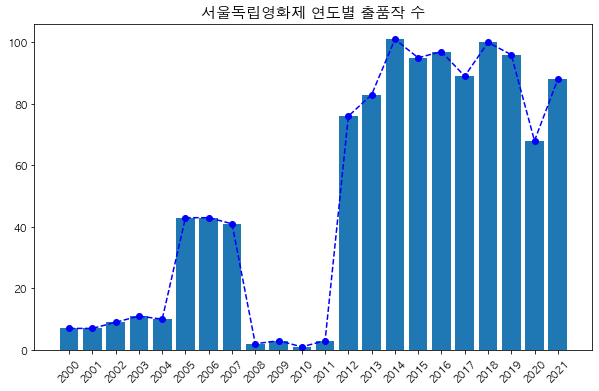

In [113]:
fig = plt.figure(figsize=(10,6)) 
xtick_label_position = list(range(len(df_year_seoul['year']))) ## x축 눈금 라벨이 표시될 x좌표
plt.xticks(xtick_label_position, df_year_seoul['year'], rotation=45) ## x축 눈금 라벨 출력
 
plt.bar(xtick_label_position, df_year_seoul['count']) ## 바차트 출력
plt.plot(xtick_label_position, df_year_seoul['count'], color='b',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.title('서울독립영화제 연도별 출품작 수', fontsize=15)
plt.show()


In [114]:
df_year = df.groupby(['year','film_festival']).size()
df_year = df_year.reset_index()
df_year = df_year.rename(columns={0 :'count'})
df_year_good = df_year[df_year['film_festival'].str.contains('대단한')]

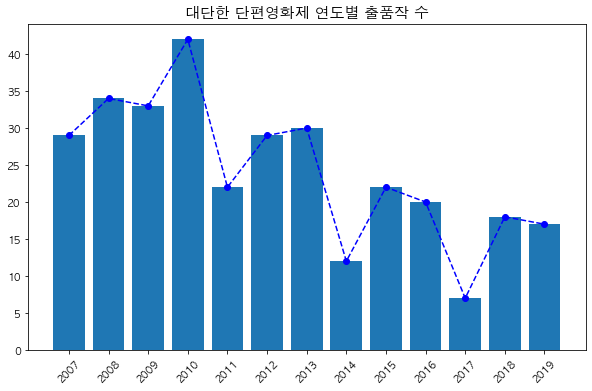

In [115]:
fig = plt.figure(figsize=(10,6)) 
xtick_label_position = list(range(len(df_year_good['year'])))
plt.xticks(xtick_label_position, df_year_good['year'], rotation=45)
 
plt.bar(xtick_label_position, df_year_good['count'])
plt.plot(xtick_label_position, df_year_good['count'], color='b',
         linestyle='--', marker='o')
plt.title('대단한 단편영화제 연도별 출품작 수', fontsize=15)
plt.show()

In [140]:
df['award'].isnull().sum()

2981

- 2000~ 2021년도까지 총 381개의 영화가 수상을 했다.

### 서울독립영화제 수상작들
- 총 116개의 작품
- 중복 수상한 감독은 3명

In [185]:
df_seoul = df[df['film_festival'].str.contains('서울독립영화제')]
df_seoul_award = df_seoul[df_seoul['award'].notnull()]
df_seoul_award

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
323,2020,서울독립영화제,최선의 삶,이우정,NaN,새로운선택상,드라마,"강이, 소영, 아람은 같은 고등학교의 친한 친구들이다. 강이는 비교적 평범해 보이고...",15세관람가,109.0,2020.0,"민아,심달기,한성민",https://ssl.pstatic.net/imgmovie/mdi/mit110/19...,http://file.koreafilm.or.kr/thm/01/copy/00/55/...
562,2019,서울독립영화제,웰컴 투 X-월드,한태의,새로운 선택 - 장편,새로운시선상,"인물,가족","구로동 아파트에는 세 사람이 산다. 나, 엄마 그리고 나의 친할아버지. 아빠가 돌아...",전체관람가,81.0,2019.0,"최미경,한태의,한흥만",https://ssl.pstatic.net/imgmovie/mdi/mit110/18...,http://file.koreafilm.or.kr/thm/01/copy/00/52/...
563,2019,서울독립영화제,남매의 여름밤,윤단비,새로운 선택 - 장편,새로운선택상,"드라마,가족",십대 소녀 옥주와 어린 남동생은 아빠와 함께 할아버지의 집에서 더부살이를 시작한다....,전체관람가,104.0,2019.0,"최정운,양흥주,박현영",https://ssl.pstatic.net/imgmovie/mdi/mit110/18...,http://file.koreafilm.or.kr/thm/01/copy/00/52/...
564,2019,서울독립영화제,상주,차정윤,새로운 선택 - 단편,특별언급,드라마,상주는 갱년기가 찾아온 중년 여성이다. 상주라는 이름 대신 누군가의 엄마이자 아내로...,12세관람가,32.0,2019.0,"박성연,박혜진,윤혜리",https://ssl.pstatic.net/imgmovie/mdi/mit110/18...,http://file.koreafilm.or.kr/thm/01/copy/00/52/...
565,2019,서울독립영화제,찬실이는 복도 많지,김초희,본선경쟁 - 장편,관객상,"드라마,멜로/로맨스,판타지",영화 프로듀서 일을 그만두게 된 찬실은 변두리 산꼭대기 마을로 이사한다. 세 들어 ...,전체관람가,96.0,2019.0,"강말금,윤여정,김영민",https://ssl.pstatic.net/imgmovie/mdi/mit110/18...,http://file.koreafilm.or.kr/thm/01/copy/00/52/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,2000,서울독립영화제,언년이,유진희,본선경쟁,우수작품상,"코메디,드라마,아동",언년이는 충청도 사투리로 모든 계집아이를 통칭하는 말이다. 언년이는 어린 시절 작가...,NaN,7.0,2000.0,"이선영,구미선",NaN,http://file.koreafilm.or.kr/thm/01/copy/00/33/...
3339,2000,서울독립영화제,팬지와 담쟁이,계운경,본선경쟁,우수작품상,인권,장애인 자매 수정과 윤정의 일상생활을 그린 다큐멘터리.서른 여섯 살의 수정은 남자를...,NaN,60.0,2000.0,"김수정,김윤정,김성주",https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,http://file.koreafilm.or.kr/thm/01/copy/00/30/...
3340,2000,서울독립영화제,인간의 시간,태준식,본선경쟁,우수작품상,기타,98년 6월 퇴출된 현대 중기 노동자들이 모회사인 현대건설로의 고용 승계를 요구하며...,NaN,116.0,2000.0,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,http://file.koreafilm.or.kr/thm/01/copy/00/29/...
3341,2000,서울독립영화제,존재,이명하,본선경쟁,최우수작품상,판타지,"비 오는 어느 날 밤, 한 바에서 개와 고양이가 만난다. 집에서 쫓겨난 고양이과 그...",NaN,6.0,1999.0,NaN,NaN,http://file.koreafilm.or.kr/thm/01/copy/00/31/...


In [184]:
df_seoul_award[df_seoul_award.duplicated(['director'])]

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
2213,2014,서울독립영화제,만일의 세계,임대형,단편 경쟁 부문,우수작품상,드라마,"오래된 연인 만일과 주희는 모처럼 일몰을 구경하기 위해 동산에 오른다. 그런데, 어...",NaN,21.0,2014.0,"배유람,박주희,임대형",https://ssl.pstatic.net/imgmovie/mdi/mit110/12...,NaN
2223,2014,서울독립영화제,4학년 보경이,이옥섭,단편 경쟁 부문,관객상,드라마,동양화학과 졸업반 보경은 덕우와 4년째 연애 중이나 선배가 좋다. 선배의 집에 다녀...,NaN,28.0,2014.0,"김꽃비,구교환,백수장",https://ssl.pstatic.net/imgmovie/mdi/mit110/12...,http://file.koreafilm.or.kr/thm/01/copy/00/48/...
2345,2013,서울독립영화제,두물머리,서동일,본선경쟁,관객상,"사회,지역","2009년 어느 여름, 팔당 농민들(남양주, 두물머리)이 평화로운 한때를 보내고 있...",NaN,95.0,2013.0,"서규섭,최요왕,임인환",https://ssl.pstatic.net/imgmovie/mdi/mit110/11...,http://file.koreafilm.or.kr/thm/01/copy/00/50/...


In [132]:
df_award = df[~df['award'].isnull()]
df_award[df_award.duplicated(subset=['director'])].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 169 to 3337
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           38 non-null     int64  
 1   film_festival  38 non-null     object 
 2   title          38 non-null     object 
 3   director       38 non-null     object 
 4   field          25 non-null     object 
 5   award          38 non-null     object 
 6   genre          38 non-null     object 
 7   plot           35 non-null     object 
 8   rating         9 non-null      object 
 9   runtime        34 non-null     float64
 10  prodYear       35 non-null     float64
 11  actors         29 non-null     object 
 12  img_link       25 non-null     object 
 13  stills         25 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 4.5+ KB


#### 구교환씨가 연출한 영화, 출연한 영화

In [130]:
df[df['director'].str.contains('구교환') | df['actors'].str.contains('구교환')]

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
173,2021,광화문국제단편영화제,4학년 보경이,이옥섭,시네마 올드 앤 뉴: 국내감독전,NaN,드라마,동양화학과 졸업반 보경은 덕우와 4년째 연애 중이나 선배가 좋다. 선배의 집에 다녀...,NaN,28.0,2014.0,"김꽃비,구교환,백수장",https://ssl.pstatic.net/imgmovie/mdi/mit110/12...,http://file.koreafilm.or.kr/thm/01/copy/00/48/...
412,2020,광화문국제단편영화제,오명,김의석,특별프로그램: 센트럴파크 10주년 특별전,NaN,드라마,학생 둘을 데리고 가기 위해 선생님이 직접 버스를 몰고 수학여행지로 향한다. 터널 ...,NaN,15.0,2015.0,"구교환,고태호,오유진",https://ssl.pstatic.net/imgmovie/mdi/mit110/14...,http://file.koreafilm.or.kr/thm/01/copy/00/51/...
577,2019,서울독립영화제,세마리,이옥섭,특별초청 - 단편,NaN,드라마,미세먼지가 심해 나가지 못하겠다던 남자친구가 나 몰래 외출을 한 것 같다.,12세관람가,36.0,2018.0,"심달기,구교환",https://ssl.pstatic.net/imgmovie/mdi/mit110/17...,http://file.koreafilm.or.kr/thm/01/copy/00/53/...
684,2019,부산독립영화제,우리 손자 베스트,김수현,딥 포커스,NaN,"드라마,코메디","취업, 연애, 인간관계, 공부... 뭐 하나 제대로 하기 어려운 헬조선에 살고 있는...",18세관람가(청소년관람불가),130.0,2016.0,"구교환,동방우,김상현",https://ssl.pstatic.net/imgmovie/mdi/mit110/14...,http://file.koreafilm.or.kr/thm/01/copy/00/47/...
957,2018,서울독립영화제,메기,이옥섭,본선경쟁 - 장편,관객상,"드라마,미스터리,코메디",성관계를 하는 엑스레이 사진이 발견되면서 병원은 발칵 뒤집힌다. 간호사 여윤영은 사...,15세관람가,89.0,2018.0,"이주영,문소리,구교환",https://ssl.pstatic.net/imgmovie/mdi/mit110/17...,http://file.koreafilm.or.kr/thm/01/copy/00/49/...
1149,2018,대단한 단편영화제,4학년 보경이,이옥섭,감독 특별전: 이옥섭,NaN,드라마,동양화학과 졸업반 보경은 덕우와 4년째 연애 중이나 선배가 좋다. 선배의 집에 다녀...,NaN,28.0,2014.0,"김꽃비,구교환,백수장",https://ssl.pstatic.net/imgmovie/mdi/mit110/12...,http://file.koreafilm.or.kr/thm/01/copy/00/48/...
1153,2018,대단한 단편영화제,세마리,이옥섭,감독 특별전: 이옥섭,NaN,드라마,미세먼지가 심해 나가지 못하겠다던 남자친구가 나 몰래 외출을 한 것 같다.,12세관람가,36.0,2018.0,"심달기,구교환",https://ssl.pstatic.net/imgmovie/mdi/mit110/17...,http://file.koreafilm.or.kr/thm/01/copy/00/53/...
1155,2018,대단한 단편영화제,서울생활,이우정,배우 특별전: 구교환,NaN,멜로드라마,"생활력이 강한 민하, 민하가 일궈 낸 온실 속에 살고 있는 기철. 둘은 그렇게 동거...",NaN,20.0,2013.0,"이채은,구교환,류혜영",https://ssl.pstatic.net/imgmovie/mdi/mit110/16...,http://file.koreafilm.or.kr/thm/01/copy/00/50/...
1614,2016,서울독립영화제,꿈의 제인,조현훈,경쟁부분_장편7,관객상,드라마,"“불행한 인생 혼자 살아 뭐하니, 그래서 다 같이 사는 거야.”혼자 남겨지는 것이 ...",18세관람가(청소년관람불가),104.0,2016.0,"이민지,구교환,이주영",https://ssl.pstatic.net/imgmovie/mdi/mit110/15...,http://file.koreafilm.or.kr/thm/01/copy/00/47/...
1633,2016,서울독립영화제,우리 손자 베스트,김수현,특별초청_장편10,NaN,"드라마,코메디","취업, 연애, 인간관계, 공부... 뭐 하나 제대로 하기 어려운 헬조선에 살고 있는...",18세관람가(청소년관람불가),130.0,2016.0,"구교환,동방우,김상현",https://ssl.pstatic.net/imgmovie/mdi/mit110/14...,http://file.koreafilm.or.kr/thm/01/copy/00/47/...


#### 홍상수 감독이 연출한 영화

In [131]:
df[df['director'].str.contains('홍상수')]

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
2331,2014,리스본 국제독립영화제,누구의 딸도 아닌 해원,홍상수,Observatory,NaN,드라마,누구에게도 말 하지 못했던 그녀의 슬프고 아름다운 며칠간의 이야기.대학생 해원(정은...,18세관람가(청소년관람불가),89.0,2012.0,"이선균,정은채,김의성",https://ssl.pstatic.net/imgmovie/mdi/mit110/09...,http://file.koreafilm.or.kr/thm/01/copy/00/40/...
2501,2013,부에노스아이레스 국제독립영화제,생활의 발견,홍상수,홍상수 회고전,NaN,"드라마,멜로드라마",연극계에서 제법 알려진 배우 경수. 잘 아는 감독만 믿고 영화에 출연했는데 흥행이 ...,18세관람가(청소년관람불가),115.0,2002.0,"김상경,추상미,예지원",https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,http://file.koreafilm.or.kr/thm/01/copy/00/18/...
2502,2013,부에노스아이레스 국제독립영화제,밤과 낮,홍상수,홍상수 회고전,NaN,드라마,국선 입선 화가인 그에게 파리는 언젠가 꼭 한 번은 찾아오고 싶었던 예술과 낭만의 ...,18세관람가(청소년관람불가),144.0,2007.0,"김영호,박은혜,황수정",https://ssl.pstatic.net/imgmovie/mdi/mit110/06...,http://file.koreafilm.or.kr/thm/01/copy/00/22/...
2503,2013,부에노스아이레스 국제독립영화제,북촌방향,홍상수,홍상수 회고전,NaN,드라마,한때 영화감독이던 성준은 서울에 올라와 북촌에 사는 선배 영호를 만나려 한다. 그러...,18세관람가(청소년관람불가),79.0,2011.0,"유준상,김상중,송선미",https://ssl.pstatic.net/imgmovie/mdi/mit110/08...,http://file.koreafilm.or.kr/thm/01/copy/00/38/...
2504,2013,부에노스아이레스 국제독립영화제,첩첩산중,홍상수,홍상수 회고전,NaN,"드라마,코메디",형부에게 선물로 받은 중고차를 몰고 전주에 있는 친구 진영(김진경)을 만나러 가는 ...,NaN,NaN,2009.0,"정유미,문성근,이선균",https://ssl.pstatic.net/imgmovie/mdi/mit110/05...,NaN
2505,2013,부에노스아이레스 국제독립영화제,옥희의 영화,홍상수,홍상수 회고전,NaN,"코메디,드라마,멜로드라마","옥희의 영화 는 주문을 외울 날 , 키스 왕 , 폭설 후 , 옥희의 영화 ...",18세관람가(청소년관람불가),80.0,2009.0,"정유미,문성근,이선균",https://ssl.pstatic.net/imgmovie/mdi/mit110/07...,http://file.koreafilm.or.kr/thm/01/copy/00/42/...
2506,2013,부에노스아이레스 국제독립영화제,잘 알지도 못하면서,홍상수,홍상수 회고전,NaN,"드라마,멜로드라마",필요할 때 모르는 척~제천의 구경남영화제에 심사위원으로 초청된 구경남. 프로그래머 ...,18세관람가(청소년관람불가),126.0,2009.0,"김태우,고현정,엄지원",https://ssl.pstatic.net/imgmovie/mdi/mit110/05...,http://file.koreafilm.or.kr/thm/01/copy/00/27/...
2507,2013,부에노스아이레스 국제독립영화제,해변의 여인,홍상수,홍상수 회고전,NaN,"드라마,멜로드라마","여행길에 만나 첫눈에 반한 두 남녀, 중래와 문숙. 밀고 당기기? 그런 건 초보들이...",15세관람가,127.0,2006.0,"김승우,고현정,송선미",https://ssl.pstatic.net/imgmovie/mdi/mit110/04...,http://file.koreafilm.or.kr/thm/01/copy/00/12/...
2508,2013,부에노스아이레스 국제독립영화제,강원도의 힘,홍상수,홍상수 회고전,NaN,멜로드라마,"지숙(오윤홍), 은경(박현영), 미선(임선영)은 강릉으로 여행을 와 우연히 한 경찰...",18세미만불가,108.0,1998.0,"백종학,오윤홍,김유석",https://ssl.pstatic.net/imgmovie/mdi/mit110/01...,http://file.koreafilm.or.kr/thm/01/copy/00/12/...


#### 서울국제음식영화제,  먹는다는 것과 우리 삶의 관계를 보여주는 영화 출품작들

In [134]:
df[df['film_festival'].str.contains('음식')]

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
91,2021,서울국제음식영화제,밥상행사,박상은,오감만족 한국단편경선,NaN,드라마,하루 저녁 밥상이 차려지고 치워지는 과정에서 일어나는 이야기.유정은 완벽한 밥상을 ...,NaN,26.0,2021.0,"손수현,오민애",https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,http://file.koreafilm.or.kr/thm/01/copy/00/57/...
92,2021,서울국제음식영화제,국물은 공짜가 아니다,강민아,오감만족 한국단편경선,NaN,드라마,"인적 드문 골목의 한편에서 인스턴트 볶음면 가게를 운영하는 수민. 때로는 냉혹하게,...",NaN,29.0,2021.0,"나애진,김차윤,손상준",https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...
93,2021,서울국제음식영화제,나이트 크루징,김정인,오감만족 한국단편경선,NaN,드라마,"어느 야심한 밤, 정체를 알 수 없는 허기를 안고 집을 나선 송이는 우연히 만난 친...",NaN,26.0,2021.0,"조현철,정연주",NaN,http://file.koreafilm.or.kr/thm/01/copy/00/56/...
94,2021,서울국제음식영화제,또 하루,박흥식,오감만족 한국단편경선,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,NaN
95,2021,서울국제음식영화제,라면먹방,김지현,오감만족 한국단편경선,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,NaN
96,2021,서울국제음식영화제,맛있는 엔딩,정소영,오감만족 한국단편경선,NaN,드라마,"오랜 연애 끝에 마침내 이별하는 날, 예니는 상혁과 사랑이 시작됐던 순간을 기억하고...",NaN,21.0,2021.0,"손수현,신재휘",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/56/...
97,2021,서울국제음식영화제,모차르트 죽이기,유원동,오감만족 한국단편경선,NaN,"드라마,시대극/사극",살리에리는 옆집으로 이사 온 모차르트를 독살하기 위해 저녁식사에 초대한다.,NaN,16.0,2019.0,"이종신,조남현,최원주",https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,http://file.koreafilm.or.kr/thm/01/copy/00/58/...
98,2021,서울국제음식영화제,밥,이순혜,NaN,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,NaN
99,2021,서울국제음식영화제,베이글,나지경,오감만족 한국단편경선,NaN,기타,NaN,NaN,NaN,NaN,NaN,https://ssl.pstatic.net/imgmovie/mdi/mit110/21...,NaN
100,2021,서울국제음식영화제,좋은날,황슬기,오감만족 한국단편경선,NaN,드라마,미금과 정아는 오랜 친구이면서도 항상 미묘한 신경전을 벌인다. 두 사람은 각자의 딸...,NaN,17.0,2021.0,"김금순,이주영",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/56/...


### 장르에 (호러),(경향),(고교) 괄호가 있는 것들 괄호 제거

In [172]:
genre_new1 = []
genre_new2 = []
genre_new3 = []
for x in df['genre']:
    if '(호러)' in x:
        genre_new1.append(x.replace('(호러)',''))
    else:
        genre_new1.append(x)
for x in genre_new1:
    if '(경향)' in x:
        genre_new2.append(x.replace('(경향)',''))
    else:
        genre_new2.append(x)
for x in genre_new2:
    if '(고교)' in x:
        genre_new3.append(x.replace('(고교)',''))
    else:
        genre_new3.append(x)

for x in genre_new3:
    if '(' in x:
        print('x')

In [175]:
df.to_csv('film_festival_new.csv',encoding="utf8", index=False)